# Gradient Descent

## One-Dimensional Gradient Descent

One-dimensional gradient descent can be understood as a first-order approximation of a Taylor expansion. For simplicity, in order to illustrate the logic behind gradient descent, we chose the function f(x)= x^2. 

In [17]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l 

def f(x): # Objective function 
    return x ** 2

def f_grad(x): # Gradient (derivative) of the objective function
    return 2 * x



In [18]:
def gd(eta, f_grad): 
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        print(f'iteration number: {i+1}, value of x: {x}, force of the gradient: {f_grad(x)}')
        results.append(float(x))
    print()
    print(f'epoch 10, x: {x:f}')
    return results

results = gd(0.2, f_grad)

iteration number: 1, value of x: 6.0, force of the gradient: 12.0
iteration number: 2, value of x: 3.5999999999999996, force of the gradient: 7.199999999999999
iteration number: 3, value of x: 2.1599999999999997, force of the gradient: 4.319999999999999
iteration number: 4, value of x: 1.2959999999999998, force of the gradient: 2.5919999999999996
iteration number: 5, value of x: 0.7775999999999998, force of the gradient: 1.5551999999999997
iteration number: 6, value of x: 0.46655999999999986, force of the gradient: 0.9331199999999997
iteration number: 7, value of x: 0.2799359999999999, force of the gradient: 0.5598719999999998
iteration number: 8, value of x: 0.16796159999999993, force of the gradient: 0.33592319999999987
iteration number: 9, value of x: 0.10077695999999996, force of the gradient: 0.20155391999999991
iteration number: 10, value of x: 0.06046617599999997, force of the gradient: 0.12093235199999994

epoch 10, x: 0.060466


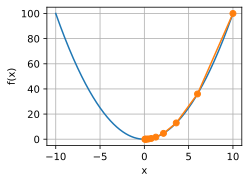

In [19]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [
        f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])

show_trace(results, f)

## Learning Rate

The learning rate _n_ can be set by the algorithm designer. If we use a learning rate that is too small, it will cause _x_ to update very slowly, requiring more iterations to get a better solution. To show what happens in such a case, consider the progress in the same optimization problem for _n=0.05_ . As we can see, even after 10 steps we are still very far from the optimal solution.

iteration number: 1, value of x: 9.0, force of the gradient: 18.0
iteration number: 2, value of x: 8.1, force of the gradient: 16.2
iteration number: 3, value of x: 7.289999999999999, force of the gradient: 14.579999999999998
iteration number: 4, value of x: 6.560999999999999, force of the gradient: 13.121999999999998
iteration number: 5, value of x: 5.9049, force of the gradient: 11.8098
iteration number: 6, value of x: 5.31441, force of the gradient: 10.62882
iteration number: 7, value of x: 4.782969, force of the gradient: 9.565938
iteration number: 8, value of x: 4.3046720999999994, force of the gradient: 8.609344199999999
iteration number: 9, value of x: 3.8742048899999997, force of the gradient: 7.748409779999999
iteration number: 10, value of x: 3.4867844009999995, force of the gradient: 6.973568801999999

epoch 10, x: 3.486784


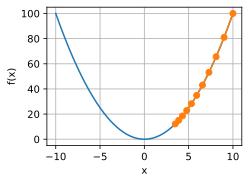

In [20]:
show_trace(gd(0.05, f_grad), f)

Note even after 100 iterations it didnt reach the global minima!!! The choice of the learning rate is really important. I need to read more about the best practices on this.

### Now what happens when we use a very large learning rate?
It might overshoot the optimal solution of x = 0 and gradually diverge

iteration number: 1, value of x: -12.0, force of the gradient: -24.0
iteration number: 2, value of x: 14.400000000000002, force of the gradient: 28.800000000000004
iteration number: 3, value of x: -17.280000000000005, force of the gradient: -34.56000000000001
iteration number: 4, value of x: 20.736000000000008, force of the gradient: 41.472000000000016
iteration number: 5, value of x: -24.883200000000013, force of the gradient: -49.766400000000026
iteration number: 6, value of x: 29.859840000000023, force of the gradient: 59.71968000000005
iteration number: 7, value of x: -35.83180800000004, force of the gradient: -71.66361600000008
iteration number: 8, value of x: 42.998169600000054, force of the gradient: 85.99633920000011
iteration number: 9, value of x: -51.59780352000007, force of the gradient: -103.19560704000014
iteration number: 10, value of x: 61.917364224000096, force of the gradient: 123.83472844800019

epoch 10, x: 61.917364


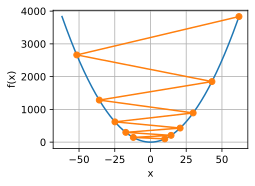

In [21]:
show_trace(gd(1.1, f_grad), f)

## What About Nonconvex functions?

One of the important facts about __nonconvex functions__ is that they might have more than one local minima which we can logically extrapolate to become the global minima when working with convex function. The example below show the implementation of gradient descent on a nonconvex function such as f(x) = x * cos(cx) for some constant _c_. This function has infinitely many local minima. So depending on our choice of the learning rate and depending on how well conditioned the problem is, we may end up with one of many solutions. 

The example below illustrates how an (unrealistically) high learning rate will lead to a poor local minimum

iteration number: 1, value of x: 0.5752220153808594, force of the gradient: 0.8909049034118652
iteration number: 2, value of x: -1.206587791442871, force of the gradient: 0.5365052223205566
iteration number: 3, value of x: -2.2795982360839844, force of the gradient: -0.46809130907058716
iteration number: 4, value of x: -1.34341561794281, force of the gradient: 0.43167704343795776
iteration number: 5, value of x: -2.2067697048187256, force of the gradient: -0.3904905915260315
iteration number: 6, value of x: -1.4257885217666626, force of the gradient: 0.3644229471683502
iteration number: 7, value of x: -2.154634475708008, force of the gradient: -0.33537960052490234
iteration number: 8, value of x: -1.4838752746582031, force of the gradient: 0.3152393698692322
iteration number: 9, value of x: -2.114354133605957, force of the gradient: -0.2930945158004761
iteration number: 10, value of x: -1.5281651020050049, force of the gradient: 0.2768053114414215

epoch 10, x: -1.528165


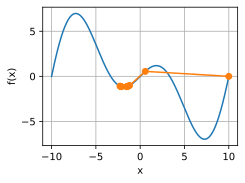

In [22]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # Objective function
    return x * torch.cos(c * x)

def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(2, f_grad), f)

iteration number: 1, value of x: 9.05752182006836, force of the gradient: 3.424492120742798
iteration number: 2, value of x: 8.372623443603516, force of the gradient: 2.1471736431121826
iteration number: 3, value of x: 7.943188667297363, force of the gradient: 1.2938504219055176
iteration number: 4, value of x: 7.684418678283691, force of the gradient: 0.7837448120117188
iteration number: 5, value of x: 7.527669906616211, force of the gradient: 0.48131006956100464
iteration number: 6, value of x: 7.431407928466797, force of the gradient: 0.2991211414337158
iteration number: 7, value of x: 7.371583938598633, force of the gradient: 0.18749797344207764
iteration number: 8, value of x: 7.334084510803223, force of the gradient: 0.11821210384368896
iteration number: 9, value of x: 7.310441970825195, force of the gradient: 0.07481390237808228
iteration number: 10, value of x: 7.2954792976379395, force of the gradient: 0.047465741634368896

epoch 10, x: 7.295479


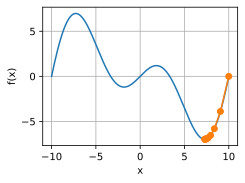

In [23]:
# chaging the learning rate to see how the nonconvex function
# will behave 

show_trace(gd(0.2, f_grad), f)

 As we can see it does find another local minima, which in this case in also the global mininum. So the choice of the learning rate is as important to the convex functions as it is for the nonconvex functions. 

## Multivariate Gradient Descent

Understand that the distiction here between univariate and multivariate is associated to the number of parameters on a real model. There are some subleties related to the multivariate case: 

* The value of __x__ here is a vector composed x1, x2, ....xn where _n_ is the number of parameters. 

* Here our function unlike the cosine and the f(x) function, the objective function here _maps vectors into scalars_. 

* And of course, the __gradient of such function is multivariate, too. It is a vector consisting of d partial derivatives of each individual parameter__.

### NOTE: 
Each individual partial derivative element in the gradient (i.e, vector) indicastes the rate of change _f_ at _x_ with respect to the input _xi_. In Andrej Karpathy's terms each individual element indicates the pull (and the direction) that need to be exerted on each individual parameter. 

The example below is based on the multivariate function:
f(x) = x1^2 + 2x2^2, that is __x__ = [x1, x2] is 2d vector as input and a scalar as output. The gradient is given as: 

__gradient__ = [2x1, 4x2] 

We will observe the trajetory of __x__ by gradient descent from the initial position [-5, -2]. 

In [37]:
def train_2d(trainer, steps=20, f_grad=None):  #@save
    """Optimize a 2D objective function with a customized trainer."""
    # `s1` and `s2` are internal state variables that will be used in Momentum, adagrad, RMSProp
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):  #@save
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                          torch.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1: -0.057646, x2: -0.000073


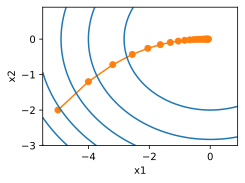

In [38]:
def f_2d(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):  # Gradient of the objective function
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

## What are Adaptive Methods????

Challenges involving the selection of learning rate: 

* If we pick it too small, we make little progress
* If we pick it too large, the solution oscillates and in the worst case it might even diverge.

What if we coudl determine the learning rate automatically? or get rid of having to selct a learning rate at all? 

Second-order methods __that look not only at the value and gradient of the objective function but also at its curvature can help in this case__. While these methods cannot be applied to deep learning directly due to the computational cost, they provide useful intuition into how to design advanced optimization algorithms that mimic many of the desirable properties of the algorithms outlined below. 


### But what if we could outsource this task to some other optimization algorithm??

## Newton's Method

What a nice definition of the Hessian Matrix!!